#Обучение нейросетевых регрессора и классификаторов

##Савинченко Юлия, 932003 (Последняя цифра зачётной книжки: 3)

##Лабораторная работа №1

In [112]:
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Dropout
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay

In [96]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Бинарный классификатор

In [97]:
data = pd.read_csv("/content/gdrive/My Drive/diabetes/diabetes_012_health_indicators_BRFSS2015.csv",sep=',')
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [98]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [100]:
dupl = data[data.duplicated()]
print(len(dupl))
dupl

23899


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,2.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [101]:
data.drop_duplicates(inplace = True)
dupl = data[data.duplicated()]
print(len(dupl))
dupl

0


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


In [102]:
binary_class = {0: 0, 1: 1, 2: 1}
data['TargetBin'] = data['Diabetes_012'].map(binary_class)
data[['Diabetes_012','TargetBin']].head(20)

,Diabetes_012,TargetBin
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
5,0.0,0
6,0.0,0
7,0.0,0
8,2.0,1
9,0.0,0


In [103]:
X = data.drop(['Diabetes_012','TargetBin', 'Income', 'MentHlth', 'Education', 'CholCheck', 'Stroke'], axis = 1)
col_after_drop = X.columns
y = data['TargetBin']

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [104]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify = y, test_size = 0.7, random_state = 77)
print(f'Train Validation : {X_train_val.shape}, Test : {X_test.shape}')

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, stratify = y_train_val, test_size = 0.33, random_state = 77)
print(f'Train : {X_train.shape}, Validation : {X_val.shape}')

Train Validation : (68934, 16), Test : (160847, 16)
Train : (46185, 16), Validation : (22749, 16)


In [105]:
classifier_bin1 = Sequential()
classifier_bin1.add(Dense(16, activation = 'relu', input_dim = X_train.shape[1]))
classifier_bin1.add(Dense(4, activation = 'relu'))
classifier_bin1.add(Dense(1, activation = 'sigmoid'))
classifier_bin1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 16)                272       
                                                                 
 dense_36 (Dense)            (None, 4)                 68        
                                                                 
 dense_37 (Dense)            (None, 1)                 5         
                                                                 
Total params: 345 (1.35 KB)
Trainable params: 345 (1.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
classifier_bin1.compile(loss= 'binary_crossentropy', optimizer= 'adamax', metrics=['accuracy', metrics.Precision(name = 'precision'), metrics.Recall(name = 'recall'), metrics.AUC(name = 'auc')])

early_stop = EarlyStopping(monitor = 'val_accuracy', patience=10, mode = 'max', verbose = 1, restore_best_weights = True)
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/diabetes/diabetes_weights-{epoch:02d}-{val_accuracy:.3f}.hdf5',
                              monitor='val_accuracy',verbose = 1, mode = 'max',
                              save_best_only = True)
callbacks_list = [early_stop, checkpoint]

In [107]:
classifier_bin1_history = classifier_bin1.fit(X_train, y_train, batch_size = 256, validation_data = (X_val, y_val), callbacks = callbacks_list, epochs = 100)

Epoch 1/100
170/181 [===========================>..] - ETA: 0s - loss: 0.5810 - accuracy: 0.8242 - precision: 0.2298 - recall: 0.0072 - auc: 0.5119
Epoch 1: val_accuracy improved from -inf to 0.82711, saving model to /content/gdrive/My Drive/diabetes/diabetes_weights-01-0.827.hdf5
181/181 [==============================] - 2s 6ms/step - loss: 0.5748 - accuracy: 0.8244 - precision: 0.2298 - recall: 0.0068 - auc: 0.5123 - val_loss: 0.4692 - val_accuracy: 0.8271 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5655
Epoch 2/100
  1/181 [..............................] - ETA: 0s - loss: 0.4844 - accuracy: 0.8203 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5379

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


161/181 [=========================>....] - ETA: 0s - loss: 0.4519 - accuracy: 0.8257 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6176
Epoch 2: val_accuracy did not improve from 0.82711
181/181 [==============================] - 1s 4ms/step - loss: 0.4487 - accuracy: 0.8271 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6235 - val_loss: 0.4350 - val_accuracy: 0.8271 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6725
Epoch 3/100
164/181 [==========================>...] - ETA: 0s - loss: 0.4279 - accuracy: 0.8268 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6955
Epoch 3: val_accuracy did not improve from 0.82711
181/181 [==============================] - 1s 3ms/step - loss: 0.4269 - accuracy: 0.8271 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6969 - val_loss: 0.4194 - val_accuracy: 0.8271 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7154
Epoch 4/100
166/181 [==========================>...] - ETA: 0s - loss: 0.413

In [40]:
classifier_bin2 = Sequential()
classifier_bin2.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
classifier_bin2.add(Dense(16, activation = 'softmax'))
classifier_bin2.add(Dense(1, activation = 'sigmoid'))
classifier_bin2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1089 (4.25 KB)
Trainable params: 1089 (4.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
classifier_bin2.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy', metrics.Precision(name = 'precision'), metrics.Recall(name = 'recall'), metrics.AUC(name = 'auc')])

early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 10, mode = 'max', verbose = 1, restore_best_weights = True)
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/diabetes/diabetes_weights-{epoch:02d}-{val_accuracy:.3f}.hdf5',
                              monitor = 'val_accuracy', verbose = 1, mode = 'max',
                              save_best_only = True)
callbacks_list = [early_stop, checkpoint]

In [42]:
classifier_bin2_history = classifier_bin2.fit(X_train, y_train, batch_size = 256, validation_data = (X_val, y_val), callbacks = callbacks_list, epochs = 100)

Epoch 1/100
172/181 [===========================>..] - ETA: 0s - loss: 0.6368 - accuracy: 0.7352 - precision: 0.1436 - recall: 0.1076 - auc: 0.4718
Epoch 1: val_accuracy improved from -inf to 0.82711, saving model to /content/gdrive/My Drive/diabetes/diabetes_weights-01-0.827.hdf5
181/181 [==============================] - 4s 9ms/step - loss: 0.6338 - accuracy: 0.7392 - precision: 0.1436 - recall: 0.1024 - auc: 0.4717 - val_loss: 0.5686 - val_accuracy: 0.8271 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.3115
Epoch 2/100
  1/181 [..............................] - ETA: 1s - loss: 0.5696 - accuracy: 0.8281 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.2390

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


160/181 [=========================>....] - ETA: 0s - loss: 0.5378 - accuracy: 0.8274 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4396
Epoch 2: val_accuracy did not improve from 0.82711
181/181 [==============================] - 1s 4ms/step - loss: 0.5351 - accuracy: 0.8271 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4446 - val_loss: 0.5097 - val_accuracy: 0.8271 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.3250
Epoch 3/100
169/181 [===========================>..] - ETA: 0s - loss: 0.4967 - accuracy: 0.8270 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4242
Epoch 3: val_accuracy did not improve from 0.82711
181/181 [==============================] - 1s 3ms/step - loss: 0.4959 - accuracy: 0.8271 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4280 - val_loss: 0.4851 - val_accuracy: 0.8271 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.3400
Epoch 4/100
172/181 [===========================>..] - ETA: 0s - loss: 0.479

In [53]:
classifier_bin3 = Sequential()
classifier_bin3.add(Dense(128, activation = 'relu', input_dim = X_train.shape[1]))
classifier_bin3.add(Dense(16, activation = 'relu'))
classifier_bin3.add(Dense(64, activation = 'relu'))
classifier_bin3.add(Dense(1, activation = 'sigmoid'))
classifier_bin3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               2176      
                                                                 
 dense_11 (Dense)            (None, 16)                2064      
                                                                 
 dense_12 (Dense)            (None, 64)                1088      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5393 (21.07 KB)
Trainable params: 5393 (21.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
classifier_bin3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', metrics.Precision(name = 'precision'), metrics.Recall(name = 'recall'), metrics.AUC(name = 'auc')])

early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 10, mode = 'max', verbose = 1, restore_best_weights = True)
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/diabetes/diabetes_weights-{epoch:02d}-{val_accuracy:.3f}.hdf5',
                              monitor = 'val_accuracy', verbose = 1, mode = 'max',
                              save_best_only = True)
callbacks_list = [early_stop, checkpoint]

In [55]:
classifier_bin3_history = classifier_bin3.fit(X_train, y_train, batch_size = 256, validation_data = (X_val, y_val), callbacks = callbacks_list, epochs = 100)

Epoch 1/100
168/181 [==========================>...] - ETA: 0s - loss: 0.4369 - accuracy: 0.8261 - precision: 0.2000 - recall: 0.0013 - auc: 0.6773
Epoch 1: val_accuracy improved from -inf to 0.82711, saving model to /content/gdrive/My Drive/diabetes/diabetes_weights-01-0.827.hdf5
181/181 [==============================] - 3s 9ms/step - loss: 0.4337 - accuracy: 0.8265 - precision: 0.2000 - recall: 0.0013 - auc: 0.6837 - val_loss: 0.3894 - val_accuracy: 0.8271 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7770
Epoch 2/100
 57/181 [========>.....................] - ETA: 0s - loss: 0.3887 - accuracy: 0.8270 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7761

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


174/181 [===========================>..] - ETA: 0s - loss: 0.3832 - accuracy: 0.8285 - precision: 0.5619 - recall: 0.0295 - auc: 0.7844
Epoch 2: val_accuracy improved from 0.82711 to 0.82988, saving model to /content/gdrive/My Drive/diabetes/diabetes_weights-02-0.830.hdf5
181/181 [==============================] - 1s 5ms/step - loss: 0.3836 - accuracy: 0.8282 - precision: 0.5625 - recall: 0.0293 - auc: 0.7842 - val_loss: 0.3792 - val_accuracy: 0.8299 - val_precision: 0.6245 - val_recall: 0.0402 - val_auc: 0.7926
Epoch 3/100
167/181 [==========================>...] - ETA: 0s - loss: 0.3779 - accuracy: 0.8317 - precision: 0.5628 - recall: 0.1301 - auc: 0.7938
Epoch 3: val_accuracy improved from 0.82988 to 0.83125, saving model to /content/gdrive/My Drive/diabetes/diabetes_weights-03-0.831.hdf5
181/181 [==============================] - 1s 4ms/step - loss: 0.3773 - accuracy: 0.8324 - precision: 0.5678 - recall: 0.1280 - auc: 0.7939 - val_loss: 0.3766 - val_accuracy: 0.8312 - val_precision

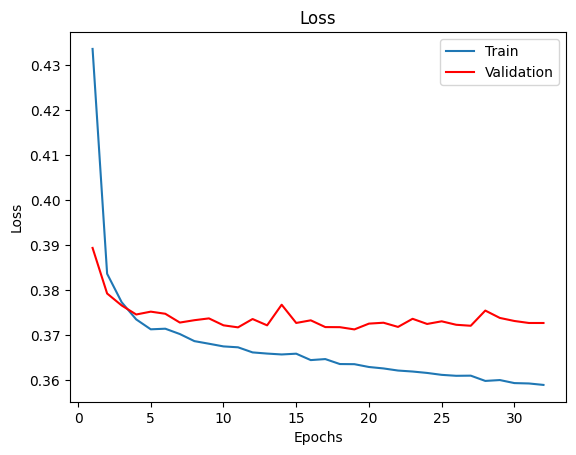

In [78]:
loss = classifier_bin3_history.history['loss']
val_loss = classifier_bin3_history.history['val_loss']
epochs = range(1 ,len(loss) + 1)

plt.title('Loss')
plt.plot(epochs, loss, label = 'Train')
plt.plot(epochs, val_loss, color='red', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

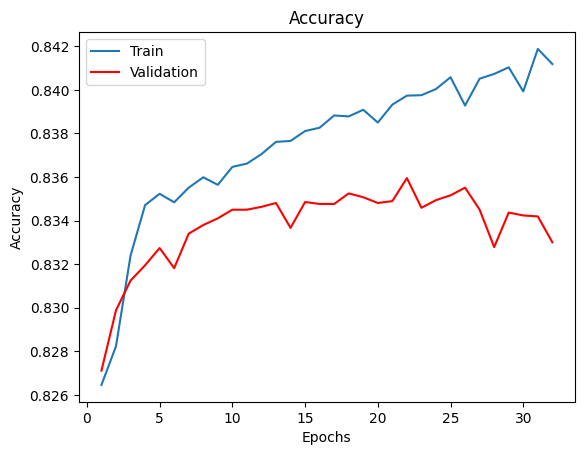

In [79]:
accuracy = classifier_bin3_history.history['accuracy']
val_accuracy = classifier_bin3_history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.title('Accuracy')
plt.plot(epochs, accuracy, label = 'Train')
plt.plot(epochs, val_accuracy, color='red', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

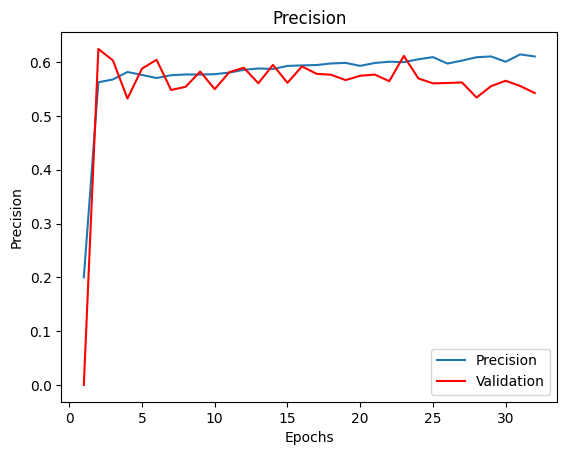

In [80]:
precision = classifier_bin3_history.history['precision']
val_precision = classifier_bin3_history.history['val_precision']
epochs = range(1, len(precision) + 1)

plt.title('Precision')
plt.plot(epochs, precision, label = 'Precision')
plt.plot(epochs, val_precision, color='red', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

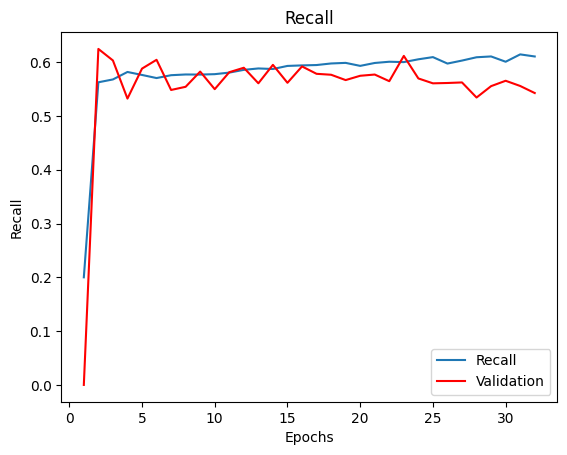

In [81]:
recall = classifier_bin3_history.history['recall']
val_recall = classifier_bin3_history.history['val_recall']
epochs = range(1, len(recall) + 1)

plt.title('Recall')
plt.plot(epochs, precision, label = 'Recall')
plt.plot(epochs, val_precision, color='red', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

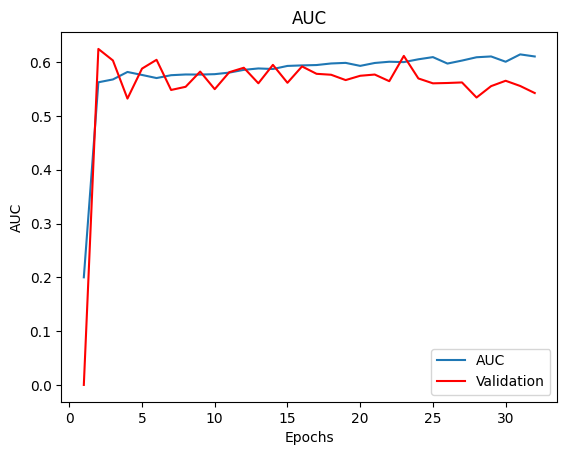

In [82]:
auc = classifier_bin3_history.history['auc']
val_auc = classifier_bin3_history.history['val_auc']
epochs = range(1, len(recall) + 1)

plt.title('AUC')
plt.plot(epochs, precision, label = 'AUC')
plt.plot(epochs, val_precision, color='red', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [109]:
classifier_bin3.fit(X_train, y_train)
y_pred_prob = classifier_bin3.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

recall = recall_score(y_test, y_pred, average = 'weighted')
precision = precision_score(y_test, y_pred, average = 'weighted')
weighted_accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Weighted Accuracy: {weighted_accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"AUC: {auc:.3f}")

5027/5027 [==============================] - 9s 2ms/step
Weighted Accuracy: 0.834
Precision: 0.802
Recall: 0.834
AUC: 0.801


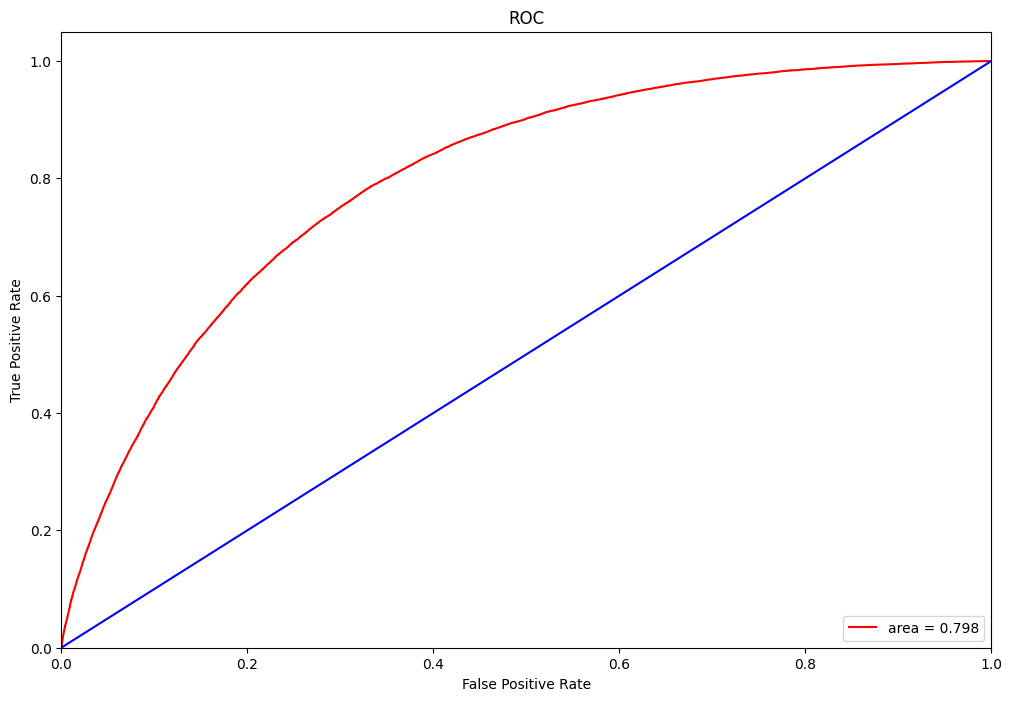

In [86]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color = 'red', label = f'area = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color = 'blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [87]:
classifier_bin3.load_weights('/content/gdrive/My Drive/diabetes/diabetes_weights-22-0.836.hdf5')
results = classifier_bin3.evaluate(X_test, y_test)

5027/5027 [==============================] - 13s 3ms/step - loss: 0.3733 - accuracy: 0.8337 - precision: 0.5481 - recall: 0.2157 - auc: 0.8012


In [92]:
x_test_pattern = X_test[10,:]
y_pred = classifier_bin3.predict(x_test_pattern.reshape(1, -1))
print('Probability: ', y_pred[0][0])

1/1 [==============================] - 0s 37ms/step
Probability:  0.08090371


In [91]:
classifier_bin3.predict(X_test)

5027/5027 [==============================] - 11s 2ms/step


array([[0.20661595],
       [0.02270957],
       [0.04766058],
       ...,
       [0.01777977],
       [0.06083295],
       [0.00380094]], dtype=float32)